# Open Responses Analysis

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
open_answers_path = "../datasets/user_justifications.parquet"

# replace with llm features path
llm_features_path = "../datasets/llm_features_with_5_new_prompts_final.parquet"

open_answers_df = pd.read_parquet(open_answers_path)
llm_df = pd.read_parquet(llm_features_path)

In [3]:
open_answers_df.head(3)

,respondent_id,date_created,date_modified,question,answer,ad_id,user_score,question_type,answer_eng
0,118769134882.0,12/22/2024 10:41:36 AM,12/22/2024 10:45:14 AM,Open Question A.2771928944,Mauvais cadrage (on ne voit pas l’intégralité ...,2771928944,3.0,A,Bad framing (we can't see the entire sofa) and...
1,118768528818.0,12/20/2024 08:55:40 PM,12/20/2024 09:04:46 PM,Open Question A.2771928944,le canapé parait sale,2771928944,2.0,A,the sofa looks dirty
2,118768335283.0,12/20/2024 04:18:38 PM,12/20/2024 04:23:12 PM,Open Question A.2771928944,car on ne voit pas bien l état du coin,2771928944,3.0,A,because we can't really see the state of the area


In [4]:
open_answers_ad_ids = open_answers_df['ad_id'].unique()
open_answers_ad_ids

array([2771928944, 2768760582, 2779170159, 2789382629, 2783908486,
       1313634546, 2500010299, 2771873993, 2783047737, 2775452985,
       2809462065, 2784815797, 2590475491, 2498540224])

In [5]:
llm_df.columns

Index(['score_generic', 'justification_generic', 'ad_id', 'img_type',
       'level_0', 'index', 'angle_degrees', 'shot_type', 'item_view',
       'background_complexity', 'num_items', 'percentage_visible',
       'resolution', 'sharpness', 'color_vividness', 'lightning',
       'overall_score', 'probability_seller', 'title', 'l3_category', 'image',
       'subject_len', 'image_len', 'image_pixelation', 'image_resolution',
       'category', 'score_criteria', 'justification_criteria', 'score_aspects',
       'justification_aspects', 'score_aspects_criteria_scoring',
       'justification_aspects_criteria_scoring',
       'score_aspects_criteria_scoring_v2',
       'justification_aspects_criteria_scoring_v2', 'event_datetime', 'status',
       'price', 'nb_images', 'creation_datetime', 'num_impressions',
       'num_views', 'ctr', 'days_active', 'pricing_type', 'condition'],
      dtype='object')

In [6]:
selected_cols = ['ad_id', 'category', 'image', 'img_type', 'title', 'overall_score', 'score_criteria', 'justification_criteria', 'score_aspects',
       'justification_aspects', 'score_aspects_criteria_scoring',
       'justification_aspects_criteria_scoring',
       'score_aspects_criteria_scoring_v2',
       'justification_aspects_criteria_scoring_v2']
        
justifications_df = llm_df[selected_cols]
justifications_df = justifications_df[justifications_df["ad_id"].isin(open_answers_ad_ids)]

print(justifications_df.shape)
selected_cols.remove('image')
justifications_df[selected_cols].head(2)

(14, 14)


,ad_id,category,img_type,title,overall_score,score_criteria,justification_criteria,score_aspects,justification_aspects,score_aspects_criteria_scoring,justification_aspects_criteria_scoring,score_aspects_criteria_scoring_v2,justification_aspects_criteria_scoring_v2
15,2590475491,Vetement,good,Veste /blouson jaune moutarde Promod,8.0,4,This image is quite good for selling a jacket ...,4,The image has several positive qualities for s...,4,The image is quite good for selling on a secon...,5,This image has good quality in most aspects su...
82,1313634546,Vetement,avg,PULL COURT multicolore-Tricoté Mains–Neuf,7.0,3,The image provides a clear view of the front o...,3,The image has some positive aspects but also a...,4,The image is quite good for selling on a secon...,4,The image has good quality in several aspects....


In [7]:
sel_cols = ['ad_id', 'category', 'score_criteria', 'justification_criteria']
justifications_subset_df = justifications_df[sel_cols]
# justifications_subset_df.to_csv(f"study_dataset/llm_criteria_score_and_justification.csv")

## Visualise ads

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def plot_image(ad_img, X, i, num_images = 8, columns = 4):
    plt.subplot(int(num_images / columns + 1), columns, i + 1)

    plt.imshow(ad_img)
    plt.subplots_adjust(hspace=0.8) 
    
    plt.axis('off')
    label = "adId:" + str(X.iloc[i].ad_id) + " (" + X.iloc[i].img_type + ") " + str(X.iloc[i].overall_score) + "\n" + str(X.iloc[i].title[:30]) 
    
    plt.text(0.5, -0.5, label, color='black', backgroundcolor='white', fontsize=14, transform=plt.gca().transAxes, ha='center')
    
def plot_images_sample(df, num_images=8):
    plt.figure(figsize=(20, 10))
    
    num_images = num_images if len(df) >= num_images else len(df)
    
    for i in range(num_images):
        ad_img_bytes = df.iloc[i].image
        ad_img = Image.open(io.BytesIO(ad_img_bytes))
        plot_image(ad_img, df, i, num_images)

In [9]:
justifications_df = justifications_df.sort_values(by='ad_id')
print(justifications_df['ad_id'])

82     1313634546
196    2498540224
89     2500010299
15     2590475491
40     2768760582
209    2771873993
15     2771928944
111    2775452985
10     2779170159
215    2783047737
101    2783908486
133    2784815797
94     2789382629
173    2809462065
Name: ad_id, dtype: int64


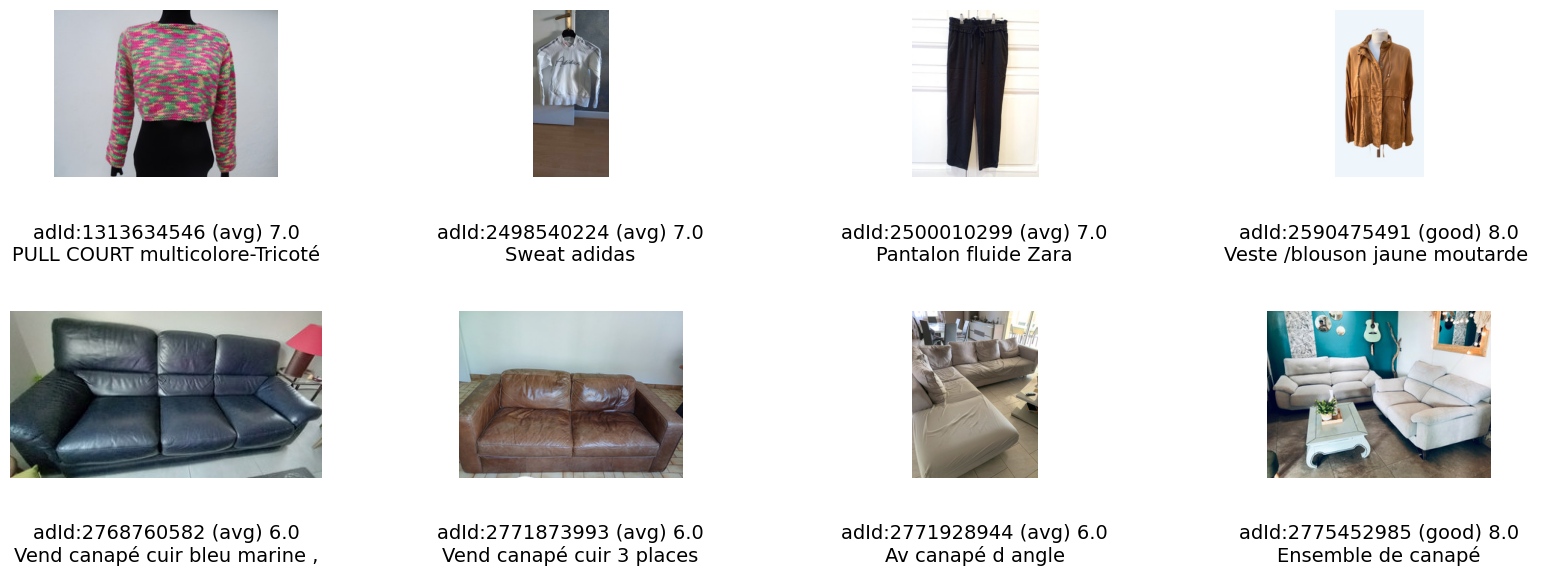

In [10]:
plot_images_sample(justifications_df[:8])

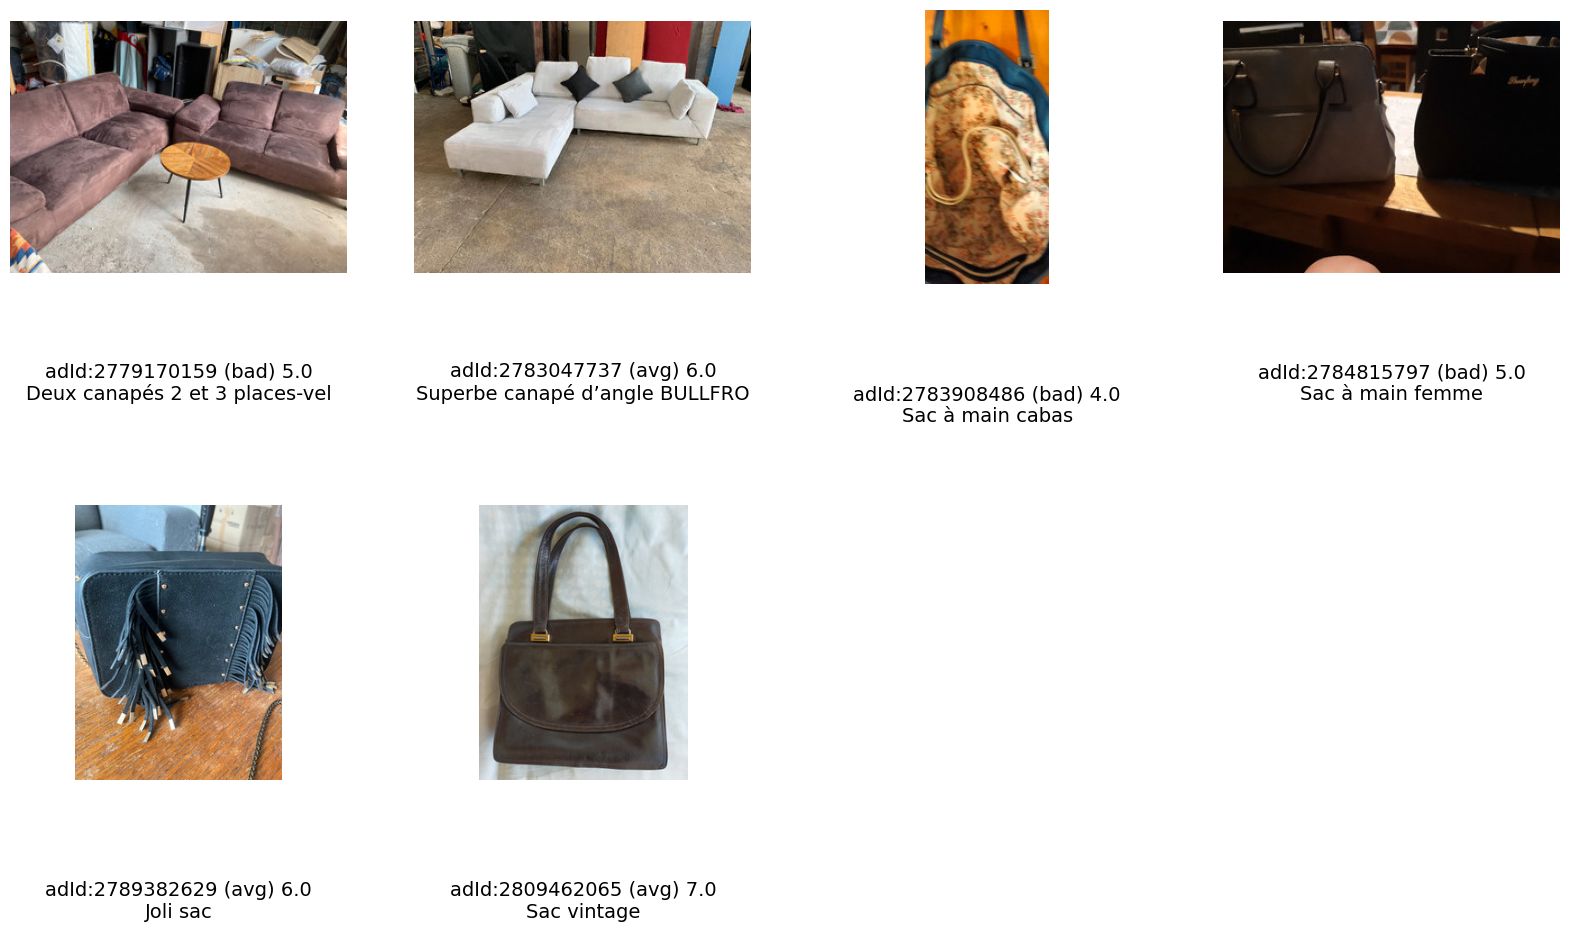

In [11]:
plot_images_sample(justifications_df[8:])

## Visualise answers

In [12]:
# show full string
pd.set_option('display.max_colwidth', None)

In [13]:
# ad_id = 2783908486
ad_id = 2809462065
selected_cols = ["respondent_id", "user_score", "answer_eng"]

answer_df = open_answers_df[(open_answers_df["ad_id"] == ad_id) & 
                            (open_answers_df["question_type"] == "A")]

answer_df[selected_cols]

,respondent_id,user_score,answer_eng
159,118770951879.0,4.0,Well presented
160,118770589656.0,2.0,the article is not highlighted
161,118770144991.0,4.0,Well framed overview correct lighting
162,118770092551.0,4.0,Good photo
163,118770024098.0,3.0,WE DO NOT SEE THE BRIDE
164,118770003491.0,4.0,RAS
165,118769958634.0,3.0,We can't clearly see all the details of the bag.
166,118769958217.0,5.0,"sharp photo, on a plain and clear background"
167,118769902456.0,4.0,The photo is clear.
168,118769766273.0,3.0,"Bad lighting, I have doubts about the color"


In [14]:
for idx, row in answer_df.iterrows():
    print(f"{row['answer_eng']} ({row['user_score']})")
    

Well presented (4.0)
the article is not highlighted (2.0)
Well framed overview correct lighting (4.0)
Good photo (4.0)
WE DO NOT SEE THE BRIDE (3.0)
RAS (4.0)
We can't clearly see all the details of the bag. (3.0)
sharp photo, on a plain and clear background (5.0)
The photo is clear. (4.0)
Bad lighting, I have doubts about the color (3.0)
The bag is clearly visible, on a different colored background (4.0)
The bag stands out well and you can clearly see the different elements (5.0)
We can't really see the depth of the photo. (3.0)
perfect framing (5.0)
Contrast is good but detail is poor (3.0)
The photo is clear, the entire bag (4.0)


In [15]:
answer_df = open_answers_df[(open_answers_df["ad_id"] == ad_id) & 
                            (open_answers_df["question_type"] == "B")]

answer_df[selected_cols]

,respondent_id,user_score,answer_eng
175,118770951879.0,4.0,put a whiter background
176,118770589656.0,2.0,I will put a background color on which the article would be more visible (would stand out)
177,118770144991.0,4.0,Best lighting
178,118770092551.0,4.0,a lighter background
179,118770024098.0,3.0,SHARPEN
180,118770003491.0,4.0,RAs
181,118769958634.0,3.0,More light and contrast
182,118769958217.0,5.0,Nothing
183,118769902456.0,4.0,none
184,118769766273.0,3.0,Best lighting for shooting


In [16]:
justification_cols = ['justification_criteria', 'justification_aspects', 'justification_aspects_criteria_scoring']
llm_answer_df = justifications_df[justifications_df["ad_id"] == ad_id][justification_cols]
llm_answer_df

,justification_criteria,justification_aspects,justification_aspects_criteria_scoring
173,"The image provides a clear, front-facing view of the handbag against a neutral background, which is good. The lighting is adequate, showing the bag's color and general condition. However, the image could be improved in several ways: 1) The bag is not centered in the frame, with empty space on the right side. 2) The lighting is a bit flat, not highlighting the bag's texture and details optimally. 3) There's no size reference or close-up of important features like clasps or brand labels. 4) The image doesn't show the interior or other angles of the bag. While it's a usable image for a second-hand marketplace listing, these improvements would make it more effective for potential buyers.","The image has some positive aspects but also areas for improvement. The background is relatively simple, which is good, as it doesn't distract from the handbag. The item is fully visible, showing the entire bag including handles. However, the lighting is somewhat flat, not highlighting the bag's features or texture optimally. The resolution appears adequate but not exceptionally high. A higher resolution would better showcase details. For a more appealing listing, improved lighting to enhance the bag's color and texture, and a slightly higher resolution would be beneficial. The current image is functional but not optimal for maximizing the item's appeal in a second-hand marketplace.","The image is not great for selling on a second-hand marketplace. While the background is relatively simple (a light-colored fabric), it's not ideal as it's slightly textured and could be distracting. The handbag is fully visible, which is good for visibility. However, the lighting is somewhat flat, not highlighting the bag's features or texture optimally. The resolution appears adequate but not exceptional. To improve, a plain white background, better lighting to showcase the bag's details, and possibly a higher resolution would make this image more effective for selling."


## Use Bedrock to compare answers

### Prepare Bedrock

In [17]:
import boto3
from botocore.config import Config
import base64
from langchain_aws.chat_models import ChatBedrock
from langchain_core.messages import SystemMessage, HumanMessage

#MODEL_ID = "anthropic.claude-3-haiku-20240307-v1:0"
# REGION_NAME = "eu-west-3"

MODEL_ID = "anthropic.claude-3-5-sonnet-20240620-v1:0"
REGION_NAME = "us-east-1"

# Setting up an AWS bedrock client
bedrock_config = Config(
    region_name=REGION_NAME,
    retries={
        "max_attempts": 5,
        "mode": "standard",
    },
    # read_timeout=500, # When you are dealing with a large prompt you need to increase the read_timeout
)

bedrock_client = boto3.client(
    service_name='bedrock-runtime',
    config=bedrock_config,
)

### Prepare prompt

In [18]:
def get_user_answers(df, ad_id, question_type):
    answer_df = df[(df["ad_id"] == ad_id) & (df["question_type"] == question_type)]
    return ', '.join(answer_df['answer_eng'])

def get_llm_answer(df, ad_id, col_name='justification_criteria'):
    llm_answer_df = df[df["ad_id"] == ad_id]
    return llm_answer_df[col_name].iloc[0]
    
ad_id = 2783908486
user_A_answers_list = get_user_answers(open_answers_df, ad_id, question_type='A')
user_B_answers_list = get_user_answers(open_answers_df, ad_id, question_type='B')
llm_answer = get_llm_answer(justifications_df, ad_id)

print("User A Answers:", user_A_answers_list)
print("----")
print("User B Answers:", user_B_answers_list)
print("----")
print("LLM Answer:", llm_answer)

User A Answers: Blurry photo, blurry, we cannot see the object correctly, only the inside of the bag is not very readable, We can't see anything, it's not very clear, it's hard to understand what it's about, We don't see anything, We don't even see what it's about
----
User B Answers: Have the whole bag in the photo and not blurry, widen the shot, take at least one clear photo, Bigger and clearer, take a wider shot, put a profile photo, Take it from further away
----
LLM Answer: The image quality is poor for selling a handbag on a second-hand marketplace. The bag is partially cut off, making it difficult to see its full shape and size. The lighting is uneven, with a bright orange background that distracts from the item. The focus is not sharp, resulting in a blurry image that doesn't show details clearly. Only a small portion of the bag is visible, which doesn't give potential buyers a good overall view of the product. To improve, the entire bag should be in frame, with better lighting

In [134]:
aspects_type = "aspects that highlight issues in the image"

# aspects_type = "aspects to improve"

user_answers_list = user_A_answers_list

prompt = f"""Given this list of answers from users: <{user_answers_list}>, and this answer from an LLM: <{llm_answer}>, 
please focus on the {aspects_type} and indicate the image aspects in common as well as the ones that are mentioned by one source but not the other. 
Provide as aspects summarized aspects. Examples of aspects are "narrow shot", "too close shot", "blurry item", "bad angle", "low item visibility", "poor lightning".
Provide the answer in JSON format and using the keys aspects_in_common, aspects_not_in_users,  aspects_not_in_llm"""

prompt

'Given this list of answers from users: <Blurry photo, blurry, we cannot see the object correctly, only the inside of the bag is not very readable, We can\'t see anything, it\'s not very clear, it\'s hard to understand what it\'s about, We don\'t see anything, We don\'t even see what it\'s about>, and this answer from an LLM: <The image quality is poor for selling a handbag on a second-hand marketplace. The bag is partially cut off, making it difficult to see its full shape and size. The lighting is uneven, with a bright orange background that distracts from the item. The focus is not sharp, resulting in a blurry image that doesn\'t show details clearly. Only a small portion of the bag is visible, which doesn\'t give potential buyers a good overall view of the product. To improve, the entire bag should be in frame, with better lighting, sharper focus, and a neutral background.>, \nplease focus on the aspects that highlight issues in the image and indicate the image aspects in common as

In [135]:
chat = ChatBedrock(
    client=bedrock_client,
    model_id=MODEL_ID,
    model_kwargs={"temperature": 0.1, "max_tokens": 300}
)

messages = [
    SystemMessage(content="Your task is to compare 2 pieces of text and decide what they have in common and what not."),
    HumanMessage(content=prompt)
]
# print(f"Number of tokens: {chat.get_num_tokens_from_messages(messages)}")

response = chat.invoke(messages)
print(f"Response: {response.content}")

Response: {
  "aspects_in_common": [
    "blurry",
    "poor image quality",
    "low item visibility"
  ],
  "aspects_not_in_users": [
    "partially cut off",
    "uneven lighting",
    "bright orange background",
    "small portion of the bag visible"
  ],
  "aspects_not_in_llm": [
    "we cannot see the object correctly",
    "only the inside of the bag is not very readable",
    "it's not very clear",
    "it's hard to understand what it's about"
  ]
}


### Aggregate user responses by ad_id

In [19]:
import statistics

def calculate_mode(scores):
    return statistics.mode(scores)

In [20]:
question_type = 'A'
qa_answers = open_answers_df[open_answers_df['question_type'] == question_type]

user_answers_by_adId = qa_answers.groupby('ad_id').agg(
    {'ad_id': 'count',
     'user_score': ['max', calculate_mode, 'mean', 'std'],
     'answer_eng': lambda x: ', '.join(x), 
     }).reset_index()

user_answers_by_adId.columns = ['ad_id', 'num_users', 'users_score_max', 'user_score_mode', 'user_score_mean', 'user_score_stddev', 'users_answers']
user_answers_by_adId = user_answers_by_adId.merge(justifications_subset_df, on='ad_id')
user_answers_by_adId

,ad_id,num_users,users_score_max,user_score_mode,user_score_mean,user_score_stddev,users_answers,category,score_criteria,justification_criteria
0,1313634546,7,5.0,3.0,3.714286,0.755929,"The article looks good overall, the colors are rather clear (in the sense that I can see them well), plus it is on a mannequin so I have an idea of ​​how it will look when worn, not specific enough, Putting on a mannequin, correct overall vision: long sleeves, short bust, neckline and pattern., The photo is blurry in certain parts - shoulders for example., It's not completely clear, The photo covers the entire garment that is worn by a model",Vetement,3,"The image provides a clear view of the front of the cropped sweater, showing its colorful pattern and general style. The lighting is adequate, and the item is displayed on a mannequin which helps show its shape. However, the image is not great for several reasons: the background is plain and not very appealing, the cropping is tight which doesn't show the full length of the sleeves, there's no view of the back or other angles, and the image resolution could be higher for better detail. While it gives a basic idea of the item, it lacks the polish and completeness that would make it more effective for selling on a second-hand marketplace."
1,2498540224,7,4.0,4.0,2.571429,1.272418,"centered photo, the lower part of the photo is useless, Small shadow, sleeves indistinguishable, Not very visible. Photo taken from too far away, poorly framed, too small. crumpled, we don't see enough details, The photo is taken from quite a distance.",Vetement,4,"The image is quite good for selling this clothing item on a second-hand marketplace. The hoodie is clearly visible, well-lit, and displayed on a hanger against a neutral background. The brand name is legible, and the overall condition of the item appears good. The only minor improvements could be to show the entire garment (the bottom is slightly cut off) and potentially capture it from a slightly wider angle to show more details. However, for a single image listing, this provides a clear representation of the item for potential buyers."
2,2500010299,3,4.0,2.0,3.000000,1.000000,"see nothing, We see the product very little but we see it completely, We see the entire article",Vetement,3,"The image provides a clear, full-length view of the black pants against a white background, which is good for visibility. However, it's not great for several reasons: 1) The pants are not on a model or mannequin, which would better show the fit and shape. 2) The lighting is somewhat flat, not highlighting texture or details. 3) There's no close-up of fabric or features like pockets or waistband. 4) The pants are slightly wrinkled, which doesn't present them in their best condition. 5) There's no size tag or measurement information visible. While the image is serviceable, these factors prevent it from being an ideal listing photo for a second-hand marketplace."
3,2590475491,9,5.0,4.0,3.777778,0.666667,"the article is well presented, the garment is clearly visible, we can roughly see the condition, Well presented product, WE CAN'T SEE THE DETAILS, no background, Clothes on a rack, we see well but we can always do better ;-), The image is clear and the contrast is quite good, Should be able to zoom",Vetement,4,"This image is quite good for selling a jacket on a second-hand marketplace. The lighting is even, providing a clear view of the item. The jacket is displayed on a mannequin, which helps showcase its fit and shape. The background is plain and uncluttered, allowing the focus to remain on the product. The color and texture of the jacket are well-represented. The only minor improvements could be a slightly closer shot to show more detail, and perhaps adjusting the collar to sit more neatly. Overall, it's a professional-looking photo that effectively presents the item for sale."
4,2768760582,11,4.0,4.0,3.600000,0.516398,"full view of the article, The photo is clear and you can s

In [73]:
user_answers_by_adId.columns

Index(['ad_id', 'num_users', 'users_score_max', 'user_score_mode',
       'user_score_mean', 'user_score_stddev', 'users_answers', 'category',
       'score_criteria', 'justification_criteria'],
      dtype='object')

In [74]:
user_answers_by_adId['users_answers_len'] = user_answers_by_adId['users_answers'].apply(len)
user_answers_by_adId['llm_answers_len'] = user_answers_by_adId['justification_criteria'].apply(len)

In [75]:
user_answers_by_adId['users_answers_len'].describe()

count     14.000000
mean     358.285714
std      124.587583
min       95.000000
25%      278.750000
50%      363.000000
75%      434.250000
max      559.000000
Name: users_answers_len, dtype: float64

In [76]:
user_answers_by_adId['llm_answers_len'].describe()

count     14.000000
mean     612.500000
std       66.465433
min      494.000000
25%      563.000000
50%      620.000000
75%      664.750000
max      708.000000
Name: llm_answers_len, dtype: float64

In [140]:
user_answers_by_adId.to_csv(f"study_dataset/question_{question_type}_agg_user_answers.csv")

### Process Question A

In [171]:
from langchain.prompts import PromptTemplate

examples = "'good item presentation', 'narrow shot', 'too close shot', 'blurry item', 'damaged item', 'clean background', 'cluttered background', 'good angle', 'bad angle', 'low item visibility', 'poor lightning'"

prompt_template = """Given this list of answers from users: <{user_answers_list}>, and this answer from an LLM: <{llm_answer}>, 
please focus on the {aspects_type} and indicate the image aspects in common as well as the ones that are mentioned by one source but not the other. 
Please provide summarized, concise and generic aspects, for example {examples} (for example, prefer "cluttered background" over "clutter in the background with a lamp").
Provide the answer in JSON format and using the keys aspects_in_common, aspects_not_in_users,  aspects_not_in_llm"""

prompt_QA = PromptTemplate(input_variables=["user_answers_list", "llm_answer", "aspects_type", "examples"], template=prompt_template)

formatted_prompt_QA = prompt_QA.format(user_answers_list=user_A_answers_list, 
                                      llm_answer=llm_answer, 
                                      aspects_type=aspects_type,
                                      examples=examples)

formatted_prompt_QA

'Given this list of answers from users: <centered photo, the lower part of the photo is useless, Small shadow, sleeves indistinguishable, Not very visible. Photo taken from too far away, poorly framed, too small. crumpled, we don\'t see enough details, The photo is taken from quite a distance.>, and this answer from an LLM: <The image provides a clear view of the entire sofa, which is good for potential buyers to see its overall shape and size. The lighting is adequate, showing the leather texture. However, the image quality could be improved. The angle is slightly skewed, not showing the sofa straight-on. The background is cluttered with a visible lamp, which distracts from the main item. The sofa itself appears worn, with visible creases and potential damage, which might deter buyers. A cleaner background, better angle, and possibly some basic staging (like adding a throw pillow) could significantly improve the image for selling purposes.>, \nplease focus on the aspects that highligh

In [172]:
import json

def get_answers_comparison(chat, prompt):
    messages = [
        SystemMessage(content="Your task is to compare 2 pieces of text and decide what they have in common and what not."),
        HumanMessage(content=prompt)
    ]

    response = chat.invoke(messages)
    return json.loads(response.content)

In [179]:
def compare_answers(open_answers_df, justifications_df, chat, prompt, question_type, examples):
    # question A
    QA_aspects_type = "aspects that highlight good or bad aspects of the image"

    # question B
    QB_aspects_type = "aspects that highlight improvements that could be done in the image"

    aspects_type = QA_aspects_type if question_type == "A" else QB_aspects_type
    
    responses = []
    open_answers_ad_ids = open_answers_df["ad_id"].unique()
    for ad_id in open_answers_ad_ids:
        print(ad_id)
        user_answers_list = get_user_answers(open_answers_df, ad_id, question_type=question_type)
        llm_answer = get_llm_answer(justifications_df, ad_id)

        formatted_prompt = prompt.format(user_answers_list=user_answers_list, 
                                     llm_answer=llm_answer, 
                                     aspects_type=aspects_type,
                                     examples=examples)

        response = get_answers_comparison(chat, formatted_prompt)

        print(type(response))

        response["ad_id"] = ad_id
        responses.append(response)
        print(response)
        print("---")
    return responses

In [182]:
question_type = "A"

responses_QA = compare_answers(open_answers_df, justifications_df, chat, prompt_QA, question_type, examples)

2771928944
<class 'dict'>
{'aspects_in_common': ['wrinkled/rumpled item', 'poor lighting', 'limited view of the item', 'cluttered background'], 'aspects_not_in_users': ['overall condition of the item', 'size of the item in the room'], 'aspects_not_in_llm': ['dirty item', 'truncated photo'], 'ad_id': 2771928944}
---
2768760582
<class 'dict'>
{'aspects_in_common': ['clear view of the entire item', 'good overview', 'poor lighting', 'poor image quality'], 'aspects_not_in_users': ['cluttered background', 'bad angle', 'visible damage on the item'], 'aspects_not_in_llm': ['not sharp', 'not balanced'], 'ad_id': 2768760582}
---
2779170159
<class 'dict'>
{'aspects_in_common': ['cluttered background', 'poor lighting', 'low item visibility', 'incomplete view of item'], 'aspects_not_in_users': ['image quality could be improved', 'angle could be adjusted to show more features'], 'aspects_not_in_llm': ['item not alone in photo', 'item not highlighted', 'item too far away', "can't see whole article", 

In [185]:
df_resp = pd.DataFrame.from_dict(responses_QA).sort_values(by='ad_id')
df_resp[["ad_id", "aspects_in_common", "aspects_not_in_users", "aspects_not_in_llm"]]

,ad_id,aspects_in_common,aspects_not_in_users,aspects_not_in_llm
5,1313634546,"[clear colors, good overall vision, blurry in certain parts, not completely clear]","[tight cropping, no view of the back or other angles, low image resolution, plain and not very appealing background]","[on a mannequin, long sleeves, short bust, neckline and pattern]"
13,2498540224,"[low item visibility, poor framing, too small image]","[good lighting, clear brand visibility, good overall condition]","[crumpled item, useless lower part of image, indistinguishable sleeves, photo taken from too far away]"
6,2500010299,"[low item visibility, poor lighting]","[no model/mannequin, flat lighting, no close-up, wrinkled item, no size/measurement info]","[see nothing, see the entire article]"
12,2590475491,"[clear image, good visibility of item, uncluttered background]","[professional-looking photo, effective presentation of item for sale]","[we can roughly see the condition, no background, clothes on a rack, we see well but we can always do better ;-)]"
1,2768760582,"[clear view of the entire item, good overview, poor lighting, poor image quality]","[cluttered background, bad angle, visible damage on the item]","[not sharp, not balanced]"
7,2771873993,"[bad angle, poor visibility of item features]","[clear view of entire sofa, adequate lighting, plain background, lack of scale reference]","[poorly framed, ugly colors, sofa not centered, condition of covering]"
0,2771928944,"[wrinkled/rumpled item, poor lighting, limited view of the item, cluttered background]","[overall condition of the item, size of the item in the room]","[dirty item, truncated photo]"
9,2775452985,"[low item visibility, bad angle, narrow shot]","[good lighting, good room context, good overall image quality]","[vague description, too many stray colors, unclear if for sofa or 2]"
2,2779170159,"[cluttered background, poor lighting, low item visibility, incomplete view of item]","[image quality could be improved, angle could be adjusted to show more features]","[item not alone in photo, item not highlighted, item too far away, can't see whole article, color visible, quality somewhat visible, whole item visible, sofa not whole, environment distorts sofa, framing too tight, bad framing, massive sofa, photo does not take up entire article, good light]"
8,2783047737,"[clear visibility of the item, uncluttered background, good overview of the item]","[sense of scale provided by the surrounding environment, potential for improvement by adjusting the angle to show more of the front of the sofa]","[sharp photo, the item is central and devoid of parasitic decorations, simple and clear]"


In [186]:
df_resp.to_csv(f"study_dataset/question_{question_type}_user_llm_comparison.csv")

### (Option 2) Pass list of valid aspects

Instead of asking the LLM to find the common answers, we pass a list of valid aspects.
Now we ask to extract the aspects for each response, LLM and User.

In [21]:
explanation = """The article looks good overall, the colors are rather clear (in the sense that I can see them well), plus it is on a mannequin so I have an idea of ​​how it will look when worn, not specific enough, Putting on a mannequin, correct overall vision: long sleeves, short bust, neckline and pattern., The photo is blurry in certain parts - shoulders for example., It's not completely clear, The photo covers the entire garment that is worn by a model"""

In [22]:
from langchain.prompts import PromptTemplate

# replace mannequin by staging
#aspects = "clear item, unclear item, item number unclear, clear item details, unclear item details, good overall condition, unclear item condition, wrinkled item, worn item, unappealing item, complete item view, incomplete item view, sense of scale, no size/reference, clean background, uncluttered background, cluttered background, plain background, distracting background, good staging, good display (mannequin), no model/mannequin, no size info/reference, poor framing, distant shot, missing angles, bad angle, good lighting, adequate lighting, poor lighting, dark/poor lighting, flat lighting, accurate colors, bright colors, clear colors, good contrast, low contrast, sharp photo, low sharpness, blurry image, blurry item, small image, low image resolution, good image resolution."

valid_aspects = "clear item, unclear item, item number unclear, clear item details, unclear item details, good overall condition, unclear item condition, wrinkled item, worn item, unappealing item, complete item view, incomplete item view, sense of scale, no size/reference, clean background, cluttered background, good staging, poor staging, no size info/reference, poor framing, distant shot, missing angles, bad angle, good lighting, poor lighting, flat lighting, clear colors, unclear colors, good contrast, low contrast, sharp image, blurry image / low sharpness, small image, low image resolution, good image resolution."

prompt_temp = "Please, extract the list of aspects captured in this explanation. The aspects should belong to this list: {valid_aspects}. Explanation: {explanation}. Only focus on the aspects that are mentioned. Only return the list of aspects and nothing else."

prompt_v2 = PromptTemplate(input_variables=["valid_aspects", "explanation"], 
                           template=prompt_temp)

prompt_text = prompt_v2.format(valid_aspects=valid_aspects, explanation=explanation)
prompt_text

"Please, extract the list of aspects captured in this explanation. The aspects should belong to this list: clear item, unclear item, item number unclear, clear item details, unclear item details, good overall condition, unclear item condition, wrinkled item, worn item, unappealing item, complete item view, incomplete item view, sense of scale, no size/reference, clean background, uncluttered background, cluttered background, plain background, distracting background, good staging, poor staging, no size info/reference, poor framing, distant shot, missing angles, bad angle, good lighting, adequate lighting, poor lighting, dark/poor lighting, flat lighting, accurate colors, bright colors, clear colors, good contrast, low contrast, sharp photo, low sharpness, blurry image, blurry item, small image, low image resolution, good image resolution.. Explanation: The article looks good overall, the colors are rather clear (in the sense that I can see them well), plus it is on a mannequin so I have

In [39]:
# example of returned list
s = "[clear item, good overall condition, complete item view, sense of scale, good staging, accurate colors, clear colors, blurry image]"

s.replace("[","").replace("]","").replace(", ",",").split(",")

['clear item',
 'good overall condition',
 'complete item view',
 'sense of scale',
 'good staging',
 'accurate colors',
 'clear colors',
 'blurry image']

In [40]:
def process_returned_list(s):
    return s.replace("[","").replace("]","").replace(", ",",").split(",")
    
def extract_aspects(chat, prompt):
    messages = [
        SystemMessage(content="Your task is to extract image quality aspects from a text given a list of valid aspects. The output MUST always be a list and nothing else."),
        HumanMessage(content=prompt)
    ]

    response = chat.invoke(messages)
    
    return process_returned_list(response.content)

chat = ChatBedrock(
    client=bedrock_client,
    model_id=MODEL_ID,
    model_kwargs={"temperature": 0, "max_tokens": 300}
)

extract_aspects(chat, prompt_text)

['clear item',
 'good overall condition',
 'complete item view',
 'sense of scale',
 'good staging',
 'accurate colors',
 'clear colors',
 'blurry image']

In [45]:
responses = []
open_answers_ad_ids = open_answers_df["ad_id"].unique()
for ad_id in open_answers_ad_ids:
    print(ad_id)
    user_answers_list = get_user_answers(open_answers_df, ad_id, question_type=question_type)
    llm_answer = get_llm_answer(justifications_df, ad_id)

    user_formatted_prompt = prompt_v2.format(valid_aspects=valid_aspects, 
                                             explanation=user_answers_list)
    
    llm_formatted_prompt = prompt_v2.format(valid_aspects=valid_aspects, 
                                            explanation=llm_answer)

    response_dict = dict()
    response_dict["user_aspects_final"] = extract_aspects(chat, user_formatted_prompt)
    response_dict["llm_aspects_final"] = extract_aspects(chat, llm_formatted_prompt)

    response_dict["ad_id"] = ad_id
    responses.append(response_dict)
    print(response_dict)
    print("---")

2771928944
{'user_aspects_final': ['poor framing', 'incomplete item view', 'poor lighting', 'unclear item condition', 'wrinkled item', 'missing angles', 'low contrast'], 'llm_aspects_final': ['clear item', 'complete item view', 'good overall condition', 'wrinkled item', 'cluttered background', 'adequate lighting', 'poor staging', 'no size info/reference', 'bad angle'], 'ad_id': 2771928944}
---
2768760582
{'user_aspects_final': ['clear item', 'complete item view', 'good staging', 'poor lighting', 'low sharpness', 'bad angle'], 'llm_aspects_final': ['clear item', 'complete item view', 'adequate lighting', 'bad angle', 'cluttered background', 'worn item', 'poor staging'], 'ad_id': 2768760582}
---
2779170159
{'user_aspects_final': ['incomplete item view', 'cluttered background', 'distant shot', 'poor framing', 'clear item', 'clear colors', 'good lighting', 'poor staging'], 'llm_aspects_final': ['clear item', 'sense of scale', 'poor lighting', 'cluttered background', 'distracting background

In [46]:
df_resp = pd.DataFrame.from_dict(responses).sort_values(by='ad_id')
df_resp

,user_aspects_final,llm_aspects_final,ad_id
5,"[clear item, good overall condition, complete item view, sense of scale, good staging, accurate colors, blurry image]","[clear item, adequate lighting, incomplete item view, plain background, poor framing, missing angles, low image resolution]",1313634546
13,"[unclear item details, incomplete item view, poor framing, distant shot, blurry image, small image, wrinkled item]","[clear item, good overall condition, clean background, plain background, good lighting, clear colors, sharp photo, good image resolution, incomplete item view]",2498540224
6,"[complete item view, distant shot]","[clear item, complete item view, clean background, plain background, wrinkled item, flat lighting, no size info/reference, poor staging]",2500010299
12,"[clear item, good overall condition, incomplete item view, unclear item details, clean background, good staging, good contrast, sharp photo]","[clear item, clean background, uncluttered background, plain background, good lighting, adequate lighting, good staging, accurate colors]",2590475491
1,"[clear item, complete item view, good staging, poor lighting, low sharpness, bad angle]","[clear item, complete item view, adequate lighting, bad angle, cluttered background, worn item, poor staging]",2768760582
7,"[poor framing, unappealing item, poor staging, incomplete item view, unclear item condition]","[clear item, complete item view, adequate lighting, plain background, no size info/reference, bad angle]",2771873993
0,"[poor framing, incomplete item view, poor lighting, unclear item condition, wrinkled item, missing angles, low contrast]","[clear item, complete item view, good overall condition, wrinkled item, cluttered background, adequate lighting, poor staging, no size info/reference, bad angle]",2771928944
9,"[unclear item, poor framing, incomplete item view, no size/reference, distant shot, missing angles, sharp photo, small image, low image resolution, unclear item details]","[clear item, complete item view, good lighting, accurate colors, good staging, good image resolution]",2775452985
2,"[incomplete item view, cluttered background, distant shot, poor framing, clear item, clear colors, good lighting, poor staging]","[clear item, sense of scale, poor lighting, cluttered background, distracting background, poor staging, bad angle]",2779170159
8,"[clear item, complete item view, cluttered background, good staging, sharp photo]","[clear item, complete item view, sense of scale, adequate lighting, good staging]",2783047737


In [22]:
def extract_common_aspects(list1, list2):
    return list(set(list1).intersection(set(list2)))
    
def extract_not_in(list1, list2):
    elems_not_in_list1 = []
    for elem in list2:
        if elem not in list1:
            elems_not_in_list1.append(elem)
    return elems_not_in_list1

def union_aspects(list1, list2):
    return list(set(list1).union(set(list2)))

In [54]:
user_list = ['clear item', 'good overall condition', 'complete item view', 
         'sense of scale', 'good staging', 'accurate colors']

llm_list = ['clear item', 'good overall condition', 'complete item view', 
         'clear colors', 'blurry image']

extract_common_aspects(user_list, llm_list)

['complete item view', 'clear item', 'good overall condition']

In [55]:
# not in user
extract_not_in(user_list, llm_list)

['clear colors', 'blurry image']

In [56]:
# not in llm
extract_not_in(llm_list, user_list)

['sense of scale', 'good staging', 'accurate colors']

In [65]:
union_aspects(user_list, llm_list)

['complete item view',
 'good staging',
 'accurate colors',
 'clear colors',
 'clear item',
 'sense of scale',
 'blurry image',
 'good overall condition']

In [58]:
df_resp.columns

Index(['user_aspects_final', 'llm_aspects_final', 'ad_id'], dtype='object')

In [66]:
df_resp["aspects_in_common"] = df_resp.apply(lambda row: extract_common_aspects(row["user_aspects_final"], row["llm_aspects_final"]), axis=1)
df_resp["aspects_not_in_users"] = df_resp.apply(lambda row: extract_not_in(row["user_aspects_final"], row["llm_aspects_final"]), axis=1)
df_resp["aspects_not_in_llm"] = df_resp.apply(lambda row: extract_not_in_llm(row["llm_aspects_final"], row["user_aspects_final"]), axis=1)
df_resp["all_aspects"] = df_resp.apply(lambda row: union_aspects(row["user_aspects_final"], row["llm_aspects_final"]), axis=1)

df_resp["df_num_aspects_in_common"] = df_resp["aspects_in_common"].apply(len)
df_resp["df_num_aspects_in_llm"] = df_resp["llm_aspects_final"].apply(len)
df_resp["df_num_aspects_in_user"] = df_resp["user_aspects_final"].apply(len)
df_resp["df_num_all_aspects"] = df_resp["all_aspects"].apply(len)

df_resp["df_num_aspects_not_in_llm"] = df_resp["aspects_not_in_llm"].apply(len)
df_resp["df_num_aspects_not_in_user"] = df_resp["aspects_not_in_users"].apply(len)

In [68]:
def jaccard_index(row):
    return len(row["aspects_in_common"]) / len(row["all_aspects"])

df_resp["jaccard_index"] = df_resp.apply(lambda row: jaccard_index(row), axis=1)

In [69]:
df_resp.head()

,user_aspects_final,llm_aspects_final,ad_id,aspects_in_common,aspects_not_in_users,aspects_not_in_llm,df_num_aspects_in_common,df_num_aspects_in_llm,df_num_aspects_in_user,df_num_aspects_not_in_llm,df_num_aspects_not_in_user,all_aspects,df_num_all_aspects,jaccard_index
5,"[clear item, good overall condition, complete item view, sense of scale, good staging, accurate colors, blurry image]","[clear item, adequate lighting, incomplete item view, plain background, poor framing, missing angles, low image resolution]",1313634546,[clear item],"[adequate lighting, incomplete item view, plain background, poor framing, missing angles, low image resolution]","[good overall condition, complete item view, sense of scale, good staging, accurate colors, blurry image]",1,7,7,6,6,"[complete item view, good staging, accurate colors, poor framing, incomplete item view, plain background, missing angles, clear item, low image resolution, sense of scale, adequate lighting, blurry image, good overall condition]",13,0.076923
13,"[unclear item details, incomplete item view, poor framing, distant shot, blurry image, small image, wrinkled item]","[clear item, good overall condition, clean background, plain background, good lighting, clear colors, sharp photo, good image resolution, incomplete item view]",2498540224,[incomplete item view],"[clear item, good overall condition, clean background, plain background, good lighting, clear colors, sharp photo, good image resolution]","[unclear item details, poor framing, distant shot, blurry image, small image, wrinkled item]",1,9,7,6,8,"[clear colors, incomplete item view, good image resolution, clear item, blurry image, poor framing, wrinkled item, plain background, small image, clean background, distant shot, sharp photo, good lighting, good overall condition, unclear item details]",15,0.066667
6,"[complete item view, distant shot]","[clear item, complete item view, clean background, plain background, wrinkled item, flat lighting, no size info/reference, poor staging]",2500010299,[complete item view],"[clear item, clean background, plain background, wrinkled item, flat lighting, no size info/reference, poor staging]",[distant shot],1,8,2,1,7,"[complete item view, wrinkled item, plain background, clean background, clear item, poor staging, distant shot, no size info/reference, flat lighting]",9,0.111111
12,"[clear item, good overall condition, incomplete item view, unclear item details, clean background, good staging, good contrast, sharp photo]","[clear item, clean background, uncluttered background, plain background, good lighting, adequate lighting, good staging, accurate colors]",2590475491,"[good staging, clean background, clear item]","[uncluttered background, plain background, good lighting, adequate lighting, accurate colors]","[good overall condition, incomplete item view, unclear item details, good contrast, sharp photo]",3,8,8,5,5,"[good contrast, good staging, accurate colors, incomplete item view, plain background, clean background, clear item, sharp photo, uncluttered background, adequate lighting, good lighting, good overall condition, unclear item details]",13,0.230769
1,"[clear item, complete item view, good staging, poor lighting, low sharpness, bad angle]","[clear item, complete item view, adequate lighting, bad angle, cluttered background, worn item, poor staging]",2768760582,"[complete item view, clear item, bad angle]","[adequate lighting, cluttered background, worn item, poor staging]","[good staging, poor lighting, low sharpness]",3,7,6,3,4,"[complete item view, good staging, cluttered background, low sharpness, poor lighting, clear item, poor staging, worn item, adequate lighting, bad angle]",10,0.300000


In [ ]:
df_resp["jaccard_index"].describe()

count    14.000000
mean      0.170646
std       0.134632
min       0.000000
25%       0.069231
50%       0.118056
75%       0.287500
max       0.428571
Name: jaccard_index, dtype: float64

In [71]:
df_resp.columns

Index(['user_aspects_final', 'llm_aspects_final', 'ad_id', 'aspects_in_common',
       'aspects_not_in_users', 'aspects_not_in_llm',
       'df_num_aspects_in_common', 'df_num_aspects_in_llm',
       'df_num_aspects_in_user', 'df_num_aspects_not_in_llm',
       'df_num_aspects_not_in_user', 'all_aspects', 'df_num_all_aspects',
       'jaccard_index'],
      dtype='object')

In [72]:
DELIMITER = ';'

# def clean_string(s):
#     return s.replace(DELIMITER, '.')

# qa_df['users_answers'] = qa_df['users_answers'].apply(clean_string)
# qa_df['llm_justification'] = qa_df['llm_justification'].apply(clean_string)
# qa_df.columns

df_resp.to_csv(f"study_dataset/question_A_user_llm_comparison_extended_v2.csv", sep=DELIMITER)

### Process Question B

In [129]:
examples = "'better highlighted features', 'wider angle', 'better lightning', 'better item visibility', 'cleaner background', 'better staging', 'better framing', 'avoid backlight'"

prompt_QB = PromptTemplate(input_variables=["user_answers_list", "llm_answer", "aspects_type", "examples"], template=prompt_template)

formatted_prompt_QB = prompt_QB.format(user_answers_list=user_A_answers_list, 
                                 llm_answer=llm_answer, 
                                 aspects_type=aspects_type,
                                 examples=examples)

formatted_prompt_QB

'Given this list of answers from users: <centered photo, the lower part of the photo is useless, Small shadow, sleeves indistinguishable, Not very visible. Photo taken from too far away, poorly framed, too small. crumpled, we don\'t see enough details, The photo is taken from quite a distance.>, and this answer from an LLM: <The image provides a clear view of the entire sofa, which is good for potential buyers to see its overall shape and size. The lighting is adequate, showing the leather texture. However, the image quality could be improved. The angle is slightly skewed, not showing the sofa straight-on. The background is cluttered with a visible lamp, which distracts from the main item. The sofa itself appears worn, with visible creases and potential damage, which might deter buyers. A cleaner background, better angle, and possibly some basic staging (like adding a throw pillow) could significantly improve the image for selling purposes.>, \nplease focus on the aspects that highligh

In [135]:
question_type = "B"

responses_QB = compare_answers(open_answers_df, justifications_df, chat, prompt, question_type, examples)


2771928944
<class 'dict'>
{'aspects_in_common': ['better framing', 'better photo angle', 'better lighting', 'cleaner background', 'better staging'], 'aspects_not_in_users': ['better highlighted features', 'better sense of size in the room'], 'aspects_not_in_llm': ['avoid backlight', 'closer angle', 'front view', 'smooth out wrinkles', 'assemble the entire sofa', 'arrange the cushions'], 'ad_id': 2771928944}
---
2768760582
<class 'dict'>
{'aspects_in_common': ['better framing', 'better lighting', 'better staging', 'cleaner background'], 'aspects_not_in_users': ['better highlighted features', 'avoid backlight'], 'aspects_not_in_llm': ['wider angle', 'better item visibility'], 'ad_id': 2768760582}
---
2779170159
<class 'dict'>
{'aspects_in_common': ['better framing', 'better lighting', 'cleaner background', 'better item visibility'], 'aspects_not_in_users': ['better highlighted features', 'wider angle'], 'aspects_not_in_llm': ['take a closer look at the fabric', 'frame the entire sofa', '

In [136]:
dfB_resp = pd.DataFrame.from_dict(responses_QB)
dfB_resp[["ad_id", "aspects_in_common", "aspects_not_in_users", "aspects_not_in_llm"]]

,ad_id,aspects_in_common,aspects_not_in_users,aspects_not_in_llm
0,2771928944,"[better framing, better photo angle, better lighting, cleaner background, better staging]","[better highlighted features, better sense of size in the room]","[avoid backlight, closer angle, front view, smooth out wrinkles, assemble the entire sofa, arrange the cushions]"
1,2768760582,"[better framing, better lighting, better staging, cleaner background]","[better highlighted features, avoid backlight]","[wider angle, better item visibility]"
2,2779170159,"[better framing, better lighting, cleaner background, better item visibility]","[better highlighted features, wider angle]","[take a closer look at the fabric, frame the entire sofa, brush the sofa to catch the light better, condition the item in a salon, use a larger photo, use a sheet behind it to insulate it, use a narrower viewing angle]"
3,2789382629,"[better framing, wider angle, cleaner background]","[better highlighted features, better item visibility, better staging]","[plain neutral background, less blurry]"
4,2783908486,"[wider shot, clearer/sharper focus, better visibility of the item]","[better lighting, neutral background, better framing to show the entire bag]","[take at least one clear photo, put a profile photo]"
5,1313634546,"[more sharpness, better lighting, better pixel-level quality]","[better highlighted features, wider angle, better item visibility, cleaner background, better staging, better framing, avoid backlight]","[a more precise photo, taken from a little further down, close-up of knitting and neckline, remove the background that is too wide]"
6,2500010299,"[better item visibility, better staging]","[better highlighted features, better lighting, cleaner background, better framing, avoid backlight]",[wider angle]
7,2771873993,"[better framing, better lighting, better item visibility]","[better showcased in a styled setting, scale reference to understand the sofa's size, highlight special features, show condition of the cushions up close]","[centering the sofa, a more ""en face"" photo, complete it with other views]"
8,2783047737,"[better framing, closer view, better visibility of the item]","[better highlighted features, better lighting, cleaner background, better staging]","[tighter framing around the sofa, center the photo]"
9,2775452985,"[closer view of the items, cleaner background, better lighting, better visibility of the items]","[wider angle, better staging]","[take each sofa 1 by 1, on each side, including the back (i.e. a total of 8 photos), just complete with other detailed photos, Improve shooting, Clearer, more readable]"


In [137]:
dfB_resp.to_csv(f"study_dataset/question_{question_type}_user_llm_comparison.csv")

## Compare user-LLM aspects (Question A)

In [1]:
import pandas as pd
qa_df = pd.read_csv("study_dataset/Open Responses Analysis - Question A.csv")
print(qa_df.shape)

qa_df = qa_df.drop(columns=["hallucinations"])

qa_df.head(2)

(14, 15)


,Unnamed: 0,ad_id,image,category,num_users,users_score_max,user_score_mode,user_score_mean,user_score_stddev,llm_score,users_answers,llm_justification,user_aspects,llm_aspects
0,1,1313634546,NaN,Vetement,7,5,3,3.71,0.76,3,"The article looks good overall, the colors are...",The image provides a clear view of the front o...,"['clear item', 'complete item view', 'sense of...","['clear item', 'clear colors', 'good lighting'..."
1,2,2498540224,NaN,Vetement,7,4,4,2.57,1.27,4,"centered photo, the lower part of the photo is...",The image is quite good for selling this cloth...,"['unclear item details', 'incomplete item view...","['clear item', 'clear item condition', 'clean ..."


In [2]:
import ast

s = "['clear item', 'complete item view', 'cluttered background', 'uncluttered background']"
ast.literal_eval(s)

['clear item',
 'complete item view',
 'cluttered background',
 'uncluttered background']

In [3]:
qa_df['user_aspects'] = qa_df['user_aspects'].apply(ast.literal_eval)
qa_df['llm_aspects'] = qa_df['llm_aspects'].apply(ast.literal_eval)

qa_df["num_user_aspects"] = qa_df["user_aspects"].apply(len)
qa_df["num_llm_aspects"] = qa_df["llm_aspects"].apply(len)

In [4]:
def union_aspects(list1, list2):
    return list(set(list1).union(set(list2)))

def extract_common_aspects(list1, list2):
    return list(set(list1).intersection(set(list2)))
    
def extract_not_in(list1, list2):
    elems_not_in_list1 = []
    for elem in list2:
        if elem not in list1:
            elems_not_in_list1.append(elem)
    return elems_not_in_list1

def jaccard_index(row):
    return len(row["aspects_in_common"]) / len(row["all_aspects"])


In [5]:
qa_df["aspects_in_common"] = qa_df.apply(lambda row: extract_common_aspects(row["user_aspects"], row["llm_aspects"]), axis=1)
qa_df["aspects_not_in_users"] = qa_df.apply(lambda row: extract_not_in(row["user_aspects"], row["llm_aspects"]), axis=1)
qa_df["aspects_not_in_llm"] = qa_df.apply(lambda row: extract_not_in(row["llm_aspects"], row["user_aspects"]), axis=1)
qa_df["all_aspects"] = qa_df.apply(lambda row: union_aspects(row["user_aspects"], row["llm_aspects"]), axis=1)

qa_df["num_all_aspects"] = qa_df["all_aspects"].apply(len)
qa_df["num_aspects_in_common"] = qa_df["aspects_in_common"].apply(len)

qa_df["num_aspects_not_in_llm"] = qa_df["aspects_not_in_llm"].apply(len)
qa_df["num_aspects_not_in_user"] = qa_df["aspects_not_in_users"].apply(len)

In [6]:
qa_df['num_all_aspects'].describe()

count    14.000000
mean     10.214286
std       2.423557
min       7.000000
25%       8.000000
50%      10.000000
75%      11.750000
max      14.000000
Name: num_all_aspects, dtype: float64

In [7]:
qa_df['num_aspects_in_common'].describe()

count    14.000000
mean      2.142857
std       1.027105
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: num_aspects_in_common, dtype: float64

In [8]:
def jaccard_index(row):
    return len(row["aspects_in_common"]) / (len(row["aspects_in_common"]) + len(row["aspects_not_in_users"] + row["aspects_not_in_llm"]))

qa_df["jaccard_index"] = qa_df.apply(lambda row: jaccard_index(row), axis=1)

In [9]:
qa_df.head(2)

,Unnamed: 0,ad_id,image,category,num_users,users_score_max,user_score_mode,user_score_mean,user_score_stddev,llm_score,...,num_llm_aspects,aspects_in_common,aspects_not_in_users,aspects_not_in_llm,all_aspects,num_all_aspects,num_aspects_in_common,num_aspects_not_in_llm,num_aspects_not_in_user,jaccard_index
0,1,1313634546,NaN,Vetement,7,5,3,3.71,0.76,3,...,8,"[clear colors, good staging, clear item]","[good lighting, incomplete item view, clean ba...","[complete item view, sense of scale, blurry im...","[incomplete item view, missing angles, complet...",11,3,3,5,0.272727
1,2,2498540224,NaN,Vetement,7,4,4,2.57,1.27,4,...,5,[incomplete item view],"[clear item, clear item condition, clean backg...","[unclear item details, poor framing, distant s...","[incomplete item view, unclear item details, g...",10,1,5,4,0.100000


In [10]:
all_aspects = [aspect for sublist in qa_df["all_aspects"] for aspect in sublist] 

len(set(all_aspects))

32

In [11]:
qa_df.iloc[0]["user_aspects"]

['clear item',
 'complete item view',
 'sense of scale',
 'good staging',
 'clear colors',
 'blurry image / low sharpness']

In [12]:
qa_df["num_user_aspects"].describe()

count    14.000000
mean      6.214286
std       2.118729
min       2.000000
25%       5.250000
50%       6.000000
75%       7.000000
max      10.000000
Name: num_user_aspects, dtype: float64

In [13]:
qa_df["num_llm_aspects"].describe()

count    14.000000
mean      6.142857
std       1.292412
min       4.000000
25%       5.250000
50%       6.000000
75%       7.000000
max       8.000000
Name: num_llm_aspects, dtype: float64

In [14]:
print("Mean jaccard:", qa_df["jaccard_index"].mean())
print("Std dev jaccard:", qa_df["jaccard_index"].std())

Mean jaccard: 0.23112839541410968
Std dev jaccard: 0.14019799182065082


In [15]:
qa_df["jaccard_index"]

0     0.272727
1     0.100000
2     0.125000
3     0.300000
4     0.300000
5     0.090909
6     0.071429
7     0.076923
8     0.166667
9     0.285714
10    0.428571
11    0.375000
12    0.500000
13    0.142857
Name: jaccard_index, dtype: float64

In [16]:
pd.set_option('display.max_colwidth', None)

In [17]:
qa_df[["user_aspects", "llm_aspects", "num_aspects_in_common", "jaccard_index"]]

,user_aspects,llm_aspects,num_aspects_in_common,jaccard_index
0,"[clear item, complete item view, sense of scale, good staging, clear colors, blurry image / low sharpness]","[clear item, clear colors, good lighting, incomplete item view, clean background, good staging, missing angles, low image resolution]",3,0.272727
1,"[unclear item details, incomplete item view, poor framing, distant shot, small image, wrinkled item]","[clear item, clear item condition, clean background, good lighting, incomplete item view]",1,0.100000
2,"[unclear item, complete item view]","[clear item, complete item view, clean background, wrinkled item, flat lighting, no size info/reference, poor staging]",1,0.125000
3,"[clear item, unclear item condition, unclear item details, clean background, good staging, good contrast, sharp photo]","[clear item, clear colors, good lighting, incomplete item view, clean background, good staging]",3,0.300000
4,"[clear item, complete item view, good staging, poor lighting, blurry image / low sharpness, bad angle]","[clear item, complete item view, good lighting, bad angle, cluttered background, clear item condition, poor staging]",3,0.300000
5,"[poor framing, poor staging, incomplete item view, unclear item, unclear item condition]","[clear item, complete item view, good lighting, plain background, no size info/reference, bad angle, unclear item condition]",1,0.090909
6,"[poor framing, incomplete item view, poor lighting, unclear item condition, wrinkled item, missing angles, low contrast]","[clear item, complete item view, clear item condition, wrinkled item, cluttered background, good lighting, no size info/reference, bad angle]",1,0.071429
7,"[unclear item, poor framing, incomplete item view, distant shot, missing angles, sharp photo, small image, unclear item details]","[clear item, complete item view, good lighting, clear colors, good staging, distant shot]",1,0.076923
8,"[unclear item, incomplete item view, cluttered background, distant shot, poor framing, clear item, clear colors, good lighting, poor staging]","[clear item, sense of scale, poor lighting, cluttered background, bad angle]",2,0.166667
9,"[clear item, complete item view, cluttered background, poor framing, sharp photo]","[clear item, complete item view, sense of scale, good lighting]",2,0.285714


In [18]:
plt.figure(figsize=(10, 4))
sns.violinplot(x=qa_df["jaccard_index"])
plt.title('Violin Plot of Jaccard Indices') 
plt.xlabel('Jaccard Index') 
plt.show()

NameError: name 'plt' is not defined

In [19]:
row0 = qa_df.iloc[0]
print("aspects_in_common:", row0["aspects_in_common"])
print("aspects_not_in_users:", row0["aspects_not_in_users"])
print("aspects_not_in_llm:", row0["aspects_not_in_llm"])
print("----")
print("user_aspects:", row0["user_aspects"])
print("llm_aspects:", row0["llm_aspects"])
print("----")
print("all aspects:", row0["all_aspects"])

aspects_in_common: ['clear colors', 'good staging', 'clear item']
aspects_not_in_users: ['good lighting', 'incomplete item view', 'clean background', 'missing angles', 'low image resolution']
aspects_not_in_llm: ['complete item view', 'sense of scale', 'blurry image / low sharpness']
----
user_aspects: ['clear item', 'complete item view', 'sense of scale', 'good staging', 'clear colors', 'blurry image / low sharpness']
llm_aspects: ['clear item', 'clear colors', 'good lighting', 'incomplete item view', 'clean background', 'good staging', 'missing angles', 'low image resolution']
----
all aspects: ['incomplete item view', 'missing angles', 'complete item view', 'low image resolution', 'good staging', 'good lighting', 'clean background', 'sense of scale', 'blurry image / low sharpness', 'clear colors', 'clear item']


In [20]:
def get_all_aspects(df, column_name):
    all_aspects = []
    for aspect_list in df[column_name]:
        for aspect in aspect_list:
            all_aspects.append(aspect)
    return all_aspects
 
all_aspects = get_all_aspects(qa_df, 'all_aspects')
len(all_aspects)

143

In [21]:
all_aspects[:4]

['incomplete item view',
 'missing angles',
 'complete item view',
 'low image resolution']

In [22]:
all_aspects = get_all_aspects(qa_df, 'all_aspects')
user_aspects = get_all_aspects(qa_df, 'user_aspects') 
llm_aspects = get_all_aspects(qa_df, 'llm_aspects')

print("Total aspects:", len(all_aspects))
print("Total unique aspects:", len(set(all_aspects)))
print("----")
print("Total user aspects:", len(user_aspects))
print("Total LLM aspects:", len(llm_aspects))
print("----")
print("Unique user aspects:", len(set(user_aspects)))
print("Unique LLM aspects:",len(set(llm_aspects)))

Total aspects: 143
Total unique aspects: 32
----
Total user aspects: 87
Total LLM aspects: 86
----
Unique user aspects: 28
Unique LLM aspects: 25


### Load aspect types and groups mappings

In [23]:
mapping = pd.read_csv("study_dataset/Open Responses Analysis - Aspect Type Mapping.csv")
print(mapping.shape)
mapping.head()

(49, 3)


,Aspect,Aspect Type,Group
0,clear item,item clarity,item
1,unclear item,item clarity,item
2,item number unclear,item clarity,item
3,clear item details,item clarity,item
4,unclear item details,item clarity,item


In [24]:
mapping["Aspect Type"].nunique()

13

In [25]:
mapping["Group"].value_counts()

Group
context    19
generic    19
item       11
Name: count, dtype: int64

In [26]:
mappings_dict = mapping.set_index('Aspect')['Aspect Type'].to_dict()
mappings_dict['clear item']

'item clarity'

In [27]:
aspect_to_group = mapping.set_index('Aspect')['Group'].to_dict()
aspect_to_group['clear item']

'item'

In [28]:
aspect_type_to_group = mapping.set_index('Aspect Type')['Group'].to_dict()
aspect_type_to_group['item clarity']

'item'

## Common funcs

In [29]:
def map_aspects(aspects, mappings): 
    return list(set([mappings[aspect] for aspect in aspects]))

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_aspects(plot_data, ax=None, aspect_column='Aspect Type', plot_title=None, plot_ylabel=True):
    # Sort by count
    user_counts = plot_data[plot_data['Source'] == 'User'][aspect_column].value_counts()
    ordered_aspect_types = user_counts.index

    sns.countplot(data=plot_data, x=aspect_column, hue='Source', order=ordered_aspect_types, ax=ax)
    if not plot_title:
        ax.set_title('Aspects mentioned by users and LLM')
    else:
        ax.set_title(plot_title)
    
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if plot_ylabel:
        ax.set_ylabel('Number of ads')
    else:
        ax.set_ylabel('')
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        
        

In [31]:
def filter_by_group(plot_data, group_name):
    return plot_data[plot_data["Group"] == group_name]

### Plotting all aspects

In [32]:
plot_data = pd.DataFrame({
    'Aspect': user_aspects + llm_aspects,
    'Source': ['User'] * len(user_aspects) + ['LLM'] * len(llm_aspects)
})

plot_data['Group'] = plot_data['Aspect'].apply(lambda aspect: aspect_to_group[aspect])

plot_data.head()

,Aspect,Source,Group
0,clear item,User,item
1,complete item view,User,item
2,sense of scale,User,item
3,good staging,User,context
4,clear colors,User,generic


In [33]:
plot_data["Aspect"].value_counts()

Aspect
clear item                      18
incomplete item view            13
good lighting                   12
poor framing                    11
complete item view              11
cluttered background             9
unclear item details             8
blurry image / low sharpness     7
unclear item                     7
clean background                 7
good staging                     6
poor lighting                    6
clear colors                     5
missing angles                   5
bad angle                        5
no size info/reference           4
poor staging                     4
sharp photo                      4
unclear item condition           4
wrinkled item                    4
distant shot                     4
clear item condition             3
sense of scale                   3
good contrast                    2
small image                      2
low image resolution             2
flat lighting                    2
low contrast                     1
dark/poor lig

/var/folders/l8/8swt3lp93dz4m4cxxntwhh6m0000gn/T/ipykernel_52479/1181630387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


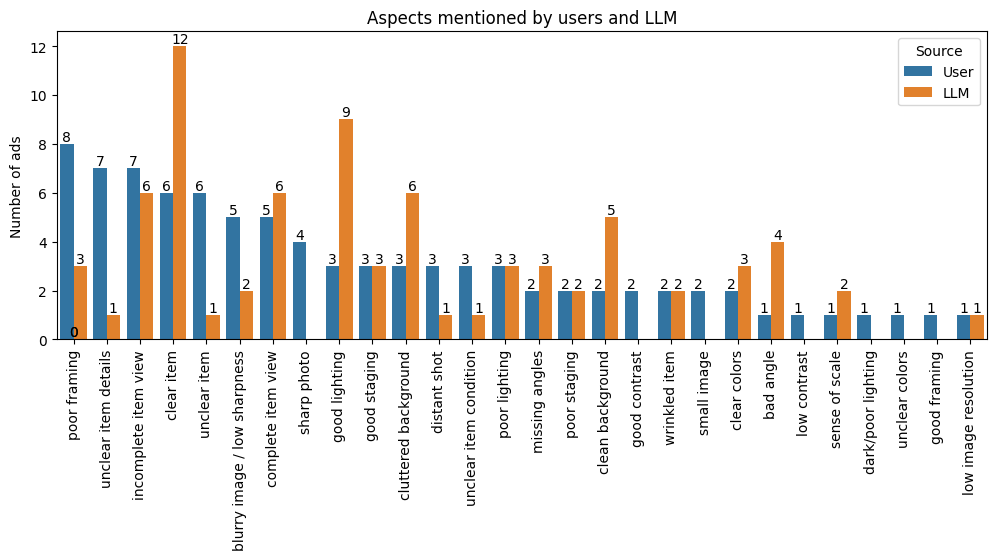

In [34]:
# Create a figure with 1 row and 1 columns
fig, ax = plt.subplots(figsize=(12, 4))
plot_aspects(plot_data, ax, aspect_column='Aspect')

#### Jaccard by group

In [35]:
def jaccard_index_aspects(row):
    user_aspect_types = row["user_aspects"]
    llm_aspect_types = row["llm_aspects"]
    
    intersect_set = set(row["user_aspects"]).intersection(set(row["llm_aspects"]))
    union_set = set(row["user_aspects"]).union(set(row["llm_aspects"]))
    
    return len(intersect_set) / len(union_set)

def jaccard_index_group(row, groups_dict, aspect_group="item"):
    user_aspect_types = row["user_aspects"]
    llm_aspect_types = row["llm_aspects"]
    
    user_aspect_types = [a for a in user_aspect_types if groups_dict[a] == aspect_group]
    llm_aspect_types = [a for a in llm_aspect_types if groups_dict[a] == aspect_group]
    
    intersect_set = set(user_aspect_types).intersection(set(llm_aspect_types))
    union_set = set(user_aspect_types).union(set(llm_aspect_types))
    
    if len(union_set) == 0:
        return 0
    
    return len(intersect_set) / len(union_set)


qa_df["jaccard_aspect"] = qa_df.apply(lambda row: jaccard_index_aspects(row), axis=1)

qa_df["jaccard_item_aspect"] = qa_df.apply(lambda row: jaccard_index_group(row, aspect_to_group, "item"), axis=1)
qa_df["jaccard_context_aspect"] = qa_df.apply(lambda row: jaccard_index_group(row, aspect_to_group, "context"), axis=1)
qa_df["jaccard_generic_aspect"] = qa_df.apply(lambda row: jaccard_index_group(row, aspect_to_group, "generic"), axis=1)


print("Mean jaccard:", round(qa_df["jaccard_aspect"].mean(), 2))
print("Std dev jaccard:", round(qa_df["jaccard_aspect"].std(), 2))

Mean jaccard: 0.23
Std dev jaccard: 0.14


In [36]:
print("Mean jaccard ITEM aspects:", round(qa_df["jaccard_item_aspect"].mean(), 2))
print("Std dev jaccard:", round(qa_df["jaccard_item_aspect"].std(), 2))
print("--")
print("Mean jaccard CONTEXT aspects:", round(qa_df["jaccard_context_aspect"].mean(), 2))
print("Std dev jaccard:", round(qa_df["jaccard_context_aspect"].std(), 2))
print("--")
print("Mean jaccard GENERIC aspects:", round(qa_df["jaccard_generic_aspect"].mean(), 2))
print("Std dev jaccard:", round(qa_df["jaccard_generic_aspect"].std(), 2))

Mean jaccard ITEM aspects: 0.32
Std dev jaccard: 0.21
--
Mean jaccard CONTEXT aspects: 0.22
Std dev jaccard: 0.29
--
Mean jaccard GENERIC aspects: 0.14
Std dev jaccard: 0.24


#### Plot aspects by group

/var/folders/l8/8swt3lp93dz4m4cxxntwhh6m0000gn/T/ipykernel_52479/1181630387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/l8/8swt3lp93dz4m4cxxntwhh6m0000gn/T/ipykernel_52479/1181630387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/l8/8swt3lp93dz4m4cxxntwhh6m0000gn/T/ipykernel_52479/1181630387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


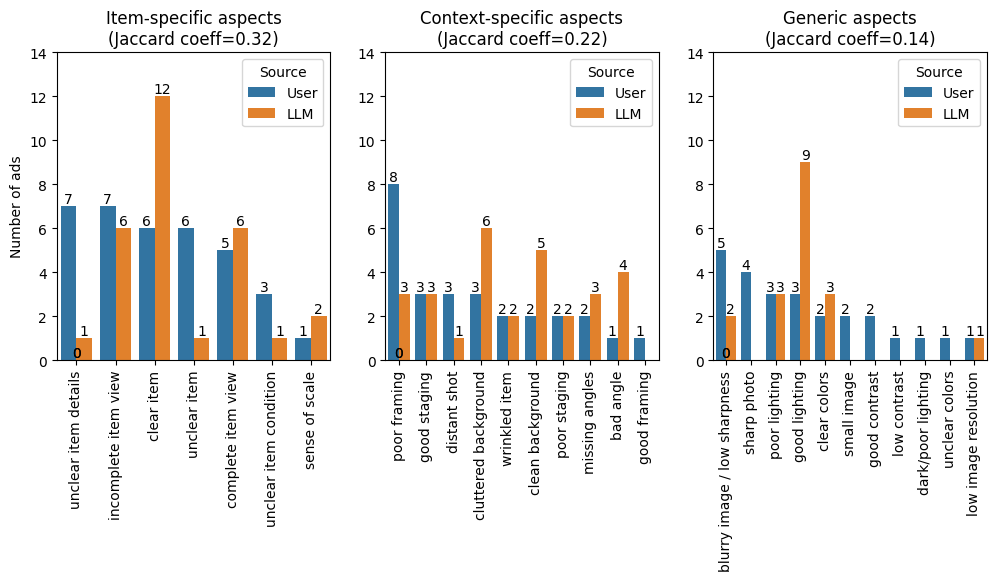

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

y_max = 14
for ax in axes: 
    ax.set_ylim(0, y_max)
    
df_group = filter_by_group(plot_data, "item")
plot_aspects(df_group, ax=axes[0], aspect_column='Aspect', plot_title="Item-specific aspects\n(Jaccard coeff=0.32)")

df_group = filter_by_group(plot_data, "context")
plot_aspects(df_group, ax=axes[1], aspect_column='Aspect', plot_title="Context-specific aspects\n(Jaccard coeff=0.22)", plot_ylabel=False)

df_group = filter_by_group(plot_data, "generic")
plot_aspects(df_group, ax=axes[2], aspect_column='Aspect', plot_title="Generic aspects\n(Jaccard coeff=0.14)", plot_ylabel=False)

#fig.suptitle('Aspects Mentioned by Users and LLM', fontsize=16)

plt.show()

### Mapping aspects to aspect types

To facilitate the interpretation we group them by aspect type

In [38]:
qa_df['user_aspect_types'] = qa_df['user_aspects'].apply(lambda x: map_aspects(x, mappings_dict))
qa_df['llm_aspect_types'] = qa_df['llm_aspects'].apply(lambda x: map_aspects(x, mappings_dict))

qa_df[['user_aspect_types','llm_aspect_types']].head()

,user_aspect_types,llm_aspect_types
0,"[staging, item clarity, sharpness, item visibility, item size, color clarity]","[background, framing, staging, resolution / size, lighting, item clarity, item visibility, color clarity]"
1,"[framing, staging, resolution / size, item clarity, item visibility]","[background, lighting, item clarity, item visibility, condition visibility]"
2,"[item visibility, item clarity]","[background, staging, lighting, item clarity, item visibility]"
3,"[background, contrast, staging, item clarity, sharpness, condition visibility]","[background, staging, lighting, item clarity, item visibility, color clarity]"
4,"[framing, staging, lighting, item clarity, sharpness, item visibility]","[background, framing, staging, lighting, item clarity, item visibility, condition visibility]"


In [39]:
user_aspect_types = get_all_aspects(qa_df, 'user_aspect_types') 
llm_aspect_types = get_all_aspects(qa_df, 'llm_aspect_types')

print("Total user aspect types:", len(user_aspect_types))
print("Total LLM aspect types:", len(llm_aspect_types))
print("----")
print("Unique user aspects:", len(set(user_aspect_types)))
print("Unique LLM aspects:",len(set(llm_aspect_types)))

Total user aspect types: 75
Total LLM aspect types: 80
----
Unique user aspects: 12
Unique LLM aspects: 11


In [40]:
def jaccard_index(row):
    user_aspect_types = row["user_aspect_types"]
    llm_aspect_types = row["llm_aspect_types"]
    
    intersect_set = set(row["user_aspect_types"]).intersection(set(row["llm_aspect_types"]))
    union_set = set(row["user_aspect_types"]).union(set(row["llm_aspect_types"]))
    
    return len(intersect_set) / len(union_set)

def jaccard_index_group(row, groups_dict, aspect_group="item"):
    user_aspect_types = row["user_aspect_types"]
    llm_aspect_types = row["llm_aspect_types"]
    
    user_aspect_types = [a for a in user_aspect_types if groups_dict[a] == aspect_group]
    llm_aspect_types = [a for a in llm_aspect_types if groups_dict[a] == aspect_group]
    
    intersect_set = set(user_aspect_types).intersection(set(llm_aspect_types))
    union_set = set(user_aspect_types).union(set(llm_aspect_types))
    
    if len(union_set) == 0:
        return 0
    
    return len(intersect_set) / len(union_set)


qa_df["jaccard_index_types"] = qa_df.apply(lambda row: jaccard_index(row), axis=1)

qa_df["jaccard_index_item"] = qa_df.apply(lambda row: jaccard_index_group(row, aspect_type_to_group, "item"), axis=1)
qa_df["jaccard_index_context"] = qa_df.apply(lambda row: jaccard_index_group(row, aspect_type_to_group, "context"), axis=1)
qa_df["jaccard_index_generic"] = qa_df.apply(lambda row: jaccard_index_group(row, aspect_type_to_group, "generic"), axis=1)

print("Mean jaccard:", qa_df["jaccard_index_types"].mean())
print("Std dev jaccard:", qa_df["jaccard_index_types"].std())

Mean jaccard: 0.46964285714285714
Std dev jaccard: 0.1720859837957263


In [41]:
print("Mean jaccard:", qa_df["jaccard_index_item"].mean())
print("Std dev jaccard:", qa_df["jaccard_index_item"].std())

Mean jaccard: 0.6785714285714286
Std dev jaccard: 0.23987430570964144


In [42]:
print("Mean jaccard:", qa_df["jaccard_index_context"].mean())
print("Std dev jaccard:", qa_df["jaccard_index_context"].std())

Mean jaccard: 0.4404761904761905
Std dev jaccard: 0.3789726489078976


In [43]:
print("Mean jaccard:", qa_df["jaccard_index_generic"].mean())
print("Std dev jaccard:", qa_df["jaccard_index_generic"].std())

Mean jaccard: 0.28214285714285714
Std dev jaccard: 0.30859928140473125


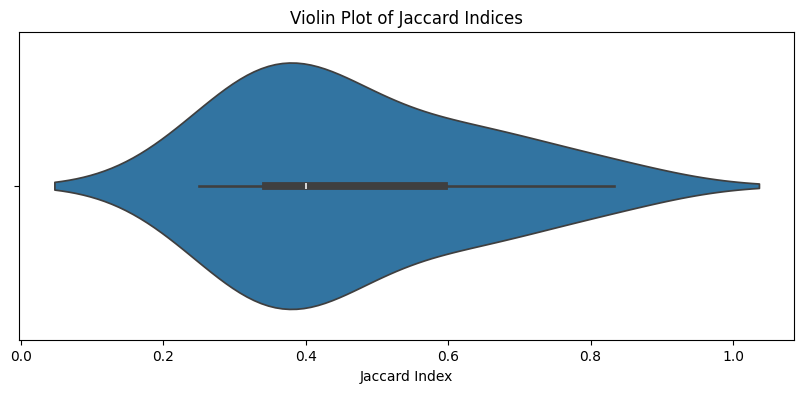

In [44]:
plt.figure(figsize=(10, 4))
sns.violinplot(x=qa_df["jaccard_index_types"])
plt.title('Violin Plot of Jaccard Indices') 
plt.xlabel('Jaccard Index') 
plt.show()

In [45]:
qa_df.columns

Index(['Unnamed: 0', 'ad_id', 'image', 'category', 'num_users',
       'users_score_max', 'user_score_mode', 'user_score_mean',
       'user_score_stddev', 'llm_score', 'users_answers', 'llm_justification',
       'user_aspects', 'llm_aspects', 'num_user_aspects', 'num_llm_aspects',
       'aspects_in_common', 'aspects_not_in_users', 'aspects_not_in_llm',
       'all_aspects', 'num_all_aspects', 'num_aspects_in_common',
       'num_aspects_not_in_llm', 'num_aspects_not_in_user', 'jaccard_index',
       'jaccard_aspect', 'jaccard_item_aspect', 'jaccard_context_aspect',
       'jaccard_generic_aspect', 'user_aspect_types', 'llm_aspect_types',
       'jaccard_index_types', 'jaccard_index_item', 'jaccard_index_context',
       'jaccard_index_generic'],
      dtype='object')

In [46]:
print(qa_df[qa_df["ad_id"] == 2809462065]["user_aspects"])
print(qa_df[qa_df["ad_id"] == 2809462065]["llm_aspects"])

13    [clear item, complete item view, good lighting, sharp photo, clean background, unclear colors, good contrast, good framing, unclear item details, low image resolution]
Name: user_aspects, dtype: object
13    [clear item, clean background, poor framing, flat lighting, no size info/reference, missing angles]
Name: llm_aspects, dtype: object


### Plotting aspects types

In [47]:
user_aspect_types = [aspect for sublist in qa_df['user_aspect_types'] for aspect in sublist] 
llm_aspect_types = [aspect for sublist in qa_df['llm_aspect_types'] for aspect in sublist]

In [50]:
aspect_types_data = pd.DataFrame({
    'Aspect Type': user_aspect_types + llm_aspect_types,
    'Source': ['User'] * len(user_aspect_types) + ['LLM'] * len(llm_aspect_types)
})

aspect_types_data["Group"] = aspect_types_data["Aspect Type"].apply(lambda aspect_type: mappings_dict[aspect_type])

aspect_types_data.head()

KeyError: 'staging'

/tmp/ipykernel_45/4066557386.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


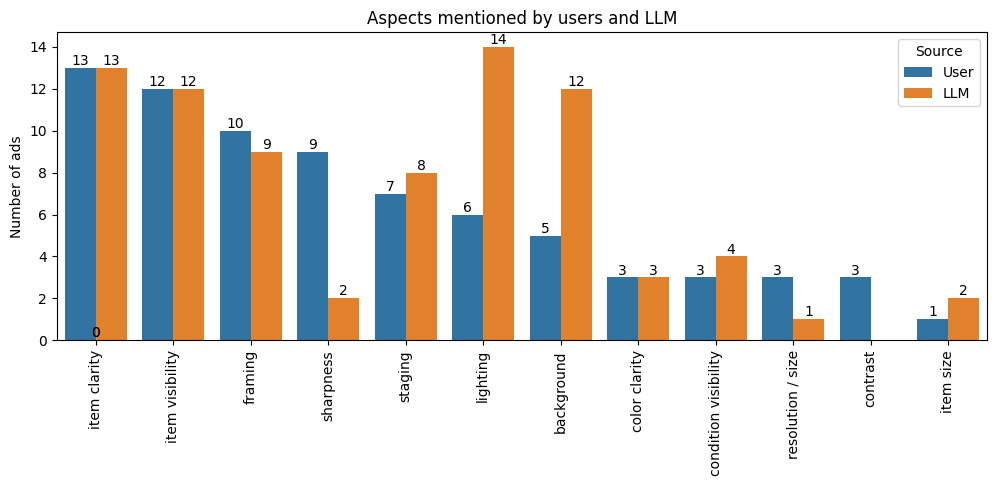

In [269]:
# Create a figure with 1 row and 1 columns
fig, ax = plt.subplots(figsize=(12, 4))
plot_aspects(aspect_types_data, ax)

#### Plot aspects by group

/tmp/ipykernel_45/1181630387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_45/1181630387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_45/1181630387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


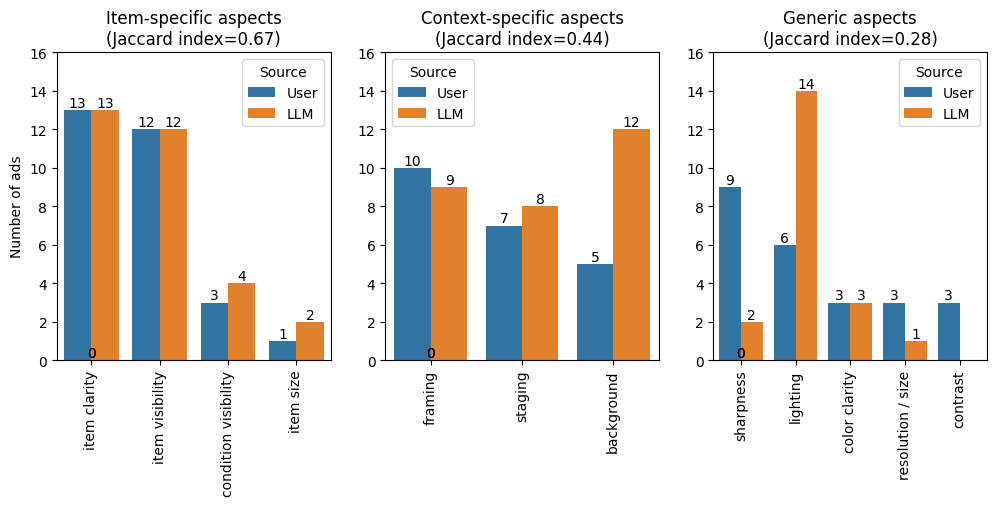

In [287]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
y_max = 16
for ax in axes: 
    ax.set_ylim(0, y_max)
    
df_group = filter_by_group(aspect_types_data, "item")
plot_aspects(df_group, ax=axes[0], plot_title="Item-specific aspects\n(Jaccard index=0.67)")

df_group = filter_by_group(aspect_types_data, "context")
plot_aspects(df_group, ax=axes[1], plot_title="Context-specific aspects\n(Jaccard index=0.44)", plot_ylabel=False)

df_group = filter_by_group(aspect_types_data, "generic")
plot_aspects(df_group, ax=axes[2], plot_title="Generic aspects\n(Jaccard index=0.28)", plot_ylabel=False)

#fig.suptitle('Aspects Mentioned by Users and LLM', fontsize=16)

plt.show()

In [230]:
# plot_aspects(df_group, plot_title="Item-specific aspects mentioned by users and LLM")

### Save to file

In [41]:
DELIMITER = ';'

def clean_string(s):
    return s.replace(DELIMITER, '.')

qa_df = qa_df.drop(columns = 'Comments from annotator (sandra)')
qa_df['users_answers'] = qa_df['users_answers'].apply(clean_string)
qa_df['llm_justification'] = qa_df['llm_justification'].apply(clean_string)
qa_df.columns

Index(['Unnamed: 0', 'ad_id', 'image', 'category', 'num_users',
       'users_score_max', 'user_score_mean', 'user_score_stddev', 'llm_score',
       'users_answers', 'llm_justification', 'aspects_in_common',
       'aspects_not_in_users', 'aspects_not_in_llm', 'num_aspects_in_common',
       'num_aspects_not_in_users', 'num_aspects_not_in_llm', 'all_ad_aspects',
       'user_aspects', 'llm_aspects', 'num_user_aspects', 'num_llm_aspects',
       'jaccard_index', 'user_aspect_types', 'llm_aspect_types',
       'jaccard_index_types'],
      dtype='object')

In [43]:
qa_df.to_csv(f"study_dataset/question_A_user_llm_comparison_extended.csv", sep=DELIMITER)